In [1]:
import nltk
import spacy

In [2]:
nlp = spacy.load("de_core_news_sm")

import re
import pprint

import glob, os

In [3]:



#doc = nlp('Daniel wohnt in Wahringerstrasse 25 Wien 1090. Es gibt kein location hier. Bob liebt in London und Paris.')
#make dictionary sentence idx: list of locations.

# sents_with_loc = []
# for sent in doc.sents:
#     for ent in sent.ents:
#         if ent.label_ == "LOC":
#             print(ent.text)
#             #sents_with_loc.append(sent)
#             #break
  

# print(sents_with_loc)
# if ent.label_ == 'LOC':
# for sent in doc.sents:
#     print(sent)
# print(list(doc.sents)[0])
          


# Building the corpus

In [4]:
data_path = "../data/interim/pdftotext"

data_files = glob.glob(data_path + os.path.sep + "*.txt"); data_files

data_files = [item.replace(data_path + os.path.sep, "") for item in data_files]  # Strip the dir name and the path separator from begining
data_files

corpus = []

for txt_file in data_files:
    with open(data_path + os.path.sep + txt_file, "r") as f:
        corpus.append(f.readlines())
        
        

In [39]:
# # flatten        
# corpus = [item for sublist in corpus for item in sublist]


# # remove emails
# for doc in corpus:
#     doc = [re.sub('\S*@\S*\s?', '', sent) for sent in doc]

In [5]:
len(corpus)

25

# Finding locations in the text (NER with Spacy)

In [6]:
nlp_corpus = []
for idx, raw in enumerate(corpus):
    print('working on number ', idx)
    print('joining')
    joined = ' '.join(raw)
    print('working on nlp')
    joined_nlp = nlp(joined)
    nlp_corpus.append(joined_nlp)
    

working on number  0
joining
working on nlp
working on number  1
joining
working on nlp
working on number  2
joining
working on nlp
working on number  3
joining
working on nlp
working on number  4
joining
working on nlp
working on number  5
joining
working on nlp
working on number  6
joining
working on nlp
working on number  7
joining
working on nlp
working on number  8
joining
working on nlp
working on number  9
joining
working on nlp
working on number  10
joining
working on nlp
working on number  11
joining
working on nlp
working on number  12
joining
working on nlp
working on number  13
joining
working on nlp
working on number  14
joining
working on nlp
working on number  15
joining
working on nlp
working on number  16
joining
working on nlp
working on number  17
joining
working on nlp
working on number  18
joining
working on nlp
working on number  19
joining
working on nlp
working on number  20
joining
working on nlp
working on number  21
joining
working on nlp
working on number  2

In [5]:
sents_with_loc = []
for idx, doc in enumerate(nlp_corpus):
    print('working on doc ', idx)
    new_list = []
    for sent in doc.sents:
        for ent in sent.ents:
            if ent.label_ == "LOC":
                new_list.append(sent)
                break
    #print(new_list)
    sents_with_loc.append(new_list)
    

working on number  0
joining
working on nlp
working on number  1
joining
working on nlp
working on number  2
joining
working on nlp
working on number  3
joining
working on nlp
working on number  4
joining
working on nlp
working on number  5
joining
working on nlp
working on number  6
joining
working on nlp
working on number  7
joining
working on nlp
working on number  8
joining
working on nlp
working on number  9
joining
working on nlp
working on number  10
joining
working on nlp
working on number  11
joining
working on nlp
working on number  12
joining
working on nlp
working on number  13
joining
working on nlp
working on number  14
joining
working on nlp
working on number  15
joining
working on nlp
working on number  16
joining
working on nlp
working on number  17
joining
working on nlp
working on number  18
joining
working on nlp
working on number  19
joining
working on nlp
working on number  20
joining
working on nlp
working on number  21
joining
working on nlp
working on number  2

In [8]:
import pandas as pd
import numpy as np
import pickle
from geotext import GeoText


In [9]:
sents_with_loc = pd.DataFrame({'doc number': [], 'location': [], 'sentence': []})

In [10]:
for idx, doc in enumerate(nlp_corpus):
    print('working on doc ', idx)
    
    for sent in doc.sents:
        locations = []
        for ent in sent.ents:
            if ent.label_ == "LOC":
                locations.append(ent.text)
        if locations:
            sents_with_loc.loc[len(sents_with_loc)] =[idx, locations, sent]
    #print(new_list)
    #sents_with_loc.append(new_list)

working on doc  0
working on doc  1
working on doc  2
working on doc  3
working on doc  4
working on doc  5
working on doc  6
working on doc  7
working on doc  8
working on doc  9
working on doc  10
working on doc  11
working on doc  12
working on doc  13
working on doc  14
working on doc  15
working on doc  16
working on doc  17
working on doc  18
working on doc  19
working on doc  20
working on doc  21
working on doc  22
working on doc  23
working on doc  24


In [31]:
sents_with_loc.head(50)

,doc number,Location,Sentence
0,0.0,[Biodiversitätsdach],"(Biodiversitätsdach, auf, dem, Besucherzentrum..."
1,0.0,"[Berlin, Pflanzenauswahl]","(Dachbegrünung, und, Biodiversität, \n \n , 2,..."
2,0.0,[Biodiversitätsdächer],"(Biodiversitätsdächer, \n \n , 16, \n \n , Koo..."
3,0.0,"[Biodiversitätsprinzipien, Biotop-Funktion]","(Durch, verschiedene, Gestaltungsmaßnahmen, un..."
4,0.0,[Biodiversitäts-Gründach],"(Dem, Deutschen, Dachgärtner, Verband, dient, ..."
5,0.0,[Biodiversitätsdach],"(Ein, ,, ,, upgrade, "", bereits, existierender..."
6,0.0,[Totholz\n ],"(10, \n \n , Einbringung, von, Totholz, \n )"
7,0.0,[Totholz],"(Totholz, wird, unter, anderem, von, Moosen, ,..."
8,0.0,[Biodiversitätsdach],"(Für, das, Biodiversitätsdach, wird, deshalb, ..."
9,0.0,[www.tu-berlin.de],"(www.dachgaertnerverband.de, \n \n , www.tu-be..."


In [32]:
len(sents_with_loc)

7728

# Identifying coutries and cities (GeoText)

In [12]:
sents_with_loc['country mentions'] = pd.Series([GeoText(str(sent)).country_mentions for sent in sents_with_loc['sentence']],
                                               index = sents_with_loc.index)

sents_with_loc['cities'] = pd.Series([GeoText(str(sent)).cities for sent in sents_with_loc['sentence']],
                                               index = sents_with_loc.index)

In [13]:
sents_with_loc['doc number'] = sents_with_loc['doc number'].astype(int)
sents_with_loc.head(100)

,doc number,location,sentence,country mentions,cities
0,0,[Biodiversitätsdach],"(Biodiversitätsdach, auf, dem, Besucherzentrum...",{'DE': 1},[Berlin]
1,0,"[Berlin, Pflanzenauswahl]","(Dachbegrünung, und, Biodiversität, \n \n , 2,...",{'DE': 1},[Berlin]
2,0,[Biodiversitätsdächer],"(Biodiversitätsdächer, \n \n , 16, \n \n , Koo...",{},[]
3,0,"[Biodiversitätsprinzipien, Biotop-Funktion]","(Durch, verschiedene, Gestaltungsmaßnahmen, un...",{},[]
4,0,[Biodiversitäts-Gründach],"(Dem, Deutschen, Dachgärtner, Verband, dient, ...",{},[]
5,0,[Biodiversitätsdach],"(Ein, ,, ,, upgrade, "", bereits, existierender...",{},[]
6,0,[Totholz\n ],"(10, \n \n , Einbringung, von, Totholz, \n )",{},[]
7,0,[Totholz],"(Totholz, wird, unter, anderem, von, Moosen, ,...",{},[]
8,0,[Biodiversitätsdach],"(Für, das, Biodiversitätsdach, wird, deshalb, ...",{},[]
9,0,[www.tu-berlin.de],"(www.dachgaertnerverband.de, \n \n , www.tu-be...",{},[]


In [76]:
from setuptools import setup
import os
import sys
#if sys.version_info < (2,7):
    
if sys.version_info > (2,7):
    ins = ['numpy','nltk','newspaper3k','jellyfish','pycountry']
else:
    ins = ['numpy','nltk','newspaper','jellyfish','pycountry']

In [87]:
import geograpy

ModuleNotFoundError: No module named 'geograpy'

In [68]:
places = GeoText("Munchen")
places.country_mentions

OrderedDict()

In [17]:

print(sents_with_loc[0][8]) 
for ent in sents_with_loc[0][8].ents:
    if ent.label_ == 'LOC':
        print(ent.text)

Für das Biodiversitätsdach wird deshalb ein abgestimmtes und kosteneffizientes Pflegekonzept entwickelt, das über die Laufzeit der IGA 2017 hinausreicht.
Biodiversitätsdach


In [25]:
import pickle
import json
# pickling_on = open("backup_list","wb")
# pickle.dump(sents_with_loc, pickling_on)
# pickling_on.close()

In [36]:
flat_sents = [item for biglist in sents_with_loc for item in biglist]
data = pickle.dumps(flat_sents[0])


TypeError: no default __reduce__ due to non-trivial __cinit__

In [26]:
with open('backup_list.txt', 'w') as filehandle:  
    json.dump(sents_with_loc, filehandle)

TypeError: Object of type Span is not JSON serializable

In [54]:
from geotext import GeoText


In [57]:
cdict = GeoText('New York, Texas, and also China').country_mentions
cdict

OrderedDict([('US', 2), ('CN', 1)])

In [48]:
str(flat_sents[0])

'Biodiversitätsdach auf dem Besucherzentrum der IGA Berlin 2017\n '

In [15]:
import collections

In [76]:
sents_with_loc.head(200)

,doc number,location,sentence,country mentions,cities
0,0,[Biodiversitätsdach],"(Biodiversitätsdach, auf, dem, Besucherzentrum...",{'DE': 1},[Berlin]
1,0,"[Berlin, Pflanzenauswahl]","(Dachbegrünung, und, Biodiversität, \n \n , 2,...",{'DE': 1},[Berlin]
2,0,[Biodiversitätsdächer],"(Biodiversitätsdächer, \n \n , 16, \n \n , Koo...",{},[]
3,0,"[Biodiversitätsprinzipien, Biotop-Funktion]","(Durch, verschiedene, Gestaltungsmaßnahmen, un...",{},[]
4,0,[Biodiversitäts-Gründach],"(Dem, Deutschen, Dachgärtner, Verband, dient, ...",{},[]
5,0,[Biodiversitätsdach],"(Ein, ,, ,, upgrade, "", bereits, existierender...",{},[]
6,0,[Totholz\n ],"(10, \n \n , Einbringung, von, Totholz, \n )",{},[]
7,0,[Totholz],"(Totholz, wird, unter, anderem, von, Moosen, ,...",{},[]
8,0,[Biodiversitätsdach],"(Für, das, Biodiversitätsdach, wird, deshalb, ...",{},[]
9,0,[www.tu-berlin.de],"(www.dachgaertnerverband.de, \n \n , www.tu-be...",{},[]


In [79]:
sents_with_loc.to_csv('sents_with_loc.csv', encoding='utf-8-sig')

In [16]:
city_count = collections.defaultdict(int)

for index, row in sents_with_loc.iterrows():
    #cities
    for city in row['cities']:
        city_count[city] += 1
    
city_count
# for sent in flat_sents:
#     small_dict = GeoText(str(sent)).country_mentions
#     while small_dict:
#         code, value = small_dict.popitem()
#         big_dict[code] += value 
# big_dict

defaultdict(int,
            {'Berlin': 395,
             'Schorndorf': 3,
             'Falkensee': 3,
             'Hamburg': 93,
             'Stuttgart': 144,
             'Hannover': 44,
             'Kornwestheim': 12,
             'Ludwigsburg': 9,
             'Karlsruhe': 13,
             'Man': 3,
             'Boden': 20,
             'Adlershof': 4,
             'Mannheim': 20,
             'Bonn': 19,
             'Köln': 37,
             'Bad Honnef': 6,
             'Bochum': 5,
             'Darmstadt': 16,
             'Rostock': 1,
             'Bremen': 15,
             'Auch': 37,
             'Lage': 16,
             'Wiesbaden': 5,
             'Kassel': 7,
             'Chicago': 9,
             'Konstanz': 1,
             'Magdeburg': 2,
             'Ende': 6,
             'Neustadt': 1,
             'Solon': 1,
             'Aral': 1,
             'Bad Hersfeld': 1,
             'Leipzig': 22,
             'Ingolstadt': 10,
             'Sheffield': 3,
       

In [120]:

sents_with_loc.head()

,doc number,Location,Sentence,country mentions,cities
0,0,[Biodiversitätsdach],"(Biodiversitätsdach, auf, dem, Besucherzentrum...",{'DE': 1},[Berlin]
1,0,"[Berlin, Pflanzenauswahl]","(Dachbegrünung, und, Biodiversität, \n \n , 2,...",{'DE': 1},[Berlin]
2,0,[Biodiversitätsdächer],"(Biodiversitätsdächer, \n \n , 16, \n \n , Koo...",{},[]
3,0,"[Biodiversitätsprinzipien, Biotop-Funktion]","(Durch, verschiedene, Gestaltungsmaßnahmen, un...",{},[]
4,0,[Biodiversitäts-Gründach],"(Dem, Deutschen, Dachgärtner, Verband, dient, ...",{},[]


# Countries mentioned in text

In [17]:
country_count = collections.defaultdict(int)

for index, row in sents_with_loc.iterrows():
    #countries
    
    for code, value in  row['country mentions'].items():
        country_count[code] += value 

country_count

defaultdict(int,
            {'DE': 1290,
             'CI': 3,
             'SE': 23,
             'FR': 50,
             'US': 124,
             'ID': 6,
             'KZ': 1,
             'CN': 18,
             'GB': 21,
             'UZ': 1,
             'KW': 12,
             'CA': 7,
             'NO': 4,
             'AU': 6,
             'MY': 1,
             'SG': 8,
             'BE': 2,
             'IL': 18,
             'PT': 15,
             'TW': 1,
             'CH': 27,
             'NL': 12,
             'ZA': 4,
             'AT': 25,
             'IT': 5,
             'RU': 4,
             'JP': 7,
             'NP': 1,
             'ES': 9,
             'PH': 3,
             'HU': 10,
             'IN': 5,
             'SK': 1,
             'AR': 1,
             'SZ': 1,
             'KR': 5,
             'MX': 7,
             'IR': 4,
             'VE': 1,
             'CL': 2,
             'MR': 1,
             'BG': 2,
             'TR': 1,
             'HK': 12

In [122]:
sents_with_loc.head()

,doc number,Location,Sentence,country mentions,cities
0,0,[Biodiversitätsdach],"(Biodiversitätsdach, auf, dem, Besucherzentrum...",{'DE': 1},[Berlin]
1,0,"[Berlin, Pflanzenauswahl]","(Dachbegrünung, und, Biodiversität, \n \n , 2,...",{'DE': 1},[Berlin]
2,0,[Biodiversitätsdächer],"(Biodiversitätsdächer, \n \n , 16, \n \n , Koo...",{},[]
3,0,"[Biodiversitätsprinzipien, Biotop-Funktion]","(Durch, verschiedene, Gestaltungsmaßnahmen, un...",{},[]
4,0,[Biodiversitäts-Gründach],"(Dem, Deutschen, Dachgärtner, Verband, dient, ...",{},[]


In [19]:
from operator import itemgetter
country_mentions = sorted(country_count.items(), key = itemgetter(1), reverse = True)

In [20]:
country_mentions

[('DE', 1290),
 ('US', 124),
 ('FR', 50),
 ('CH', 27),
 ('AT', 25),
 ('SE', 23),
 ('GB', 21),
 ('CN', 18),
 ('IL', 18),
 ('PT', 15),
 ('KW', 12),
 ('NL', 12),
 ('HK', 12),
 ('HU', 10),
 ('ES', 9),
 ('SG', 8),
 ('CA', 7),
 ('JP', 7),
 ('MX', 7),
 ('ID', 6),
 ('AU', 6),
 ('IT', 5),
 ('IN', 5),
 ('KR', 5),
 ('NO', 4),
 ('ZA', 4),
 ('RU', 4),
 ('IR', 4),
 ('CI', 3),
 ('PH', 3),
 ('BE', 2),
 ('CL', 2),
 ('BG', 2),
 ('KZ', 1),
 ('UZ', 1),
 ('MY', 1),
 ('TW', 1),
 ('NP', 1),
 ('SK', 1),
 ('AR', 1),
 ('SZ', 1),
 ('VE', 1),
 ('MR', 1),
 ('TR', 1),
 ('DK', 1),
 ('BR', 1),
 ('PL', 1)]

In [21]:
import folium
import pandas as pd
import numpy as np
import requests
import lxml

In [22]:
url = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
html = requests.get(url).content
#df_list = pd.read_html(html)

In [23]:
df_coords = pd.read_html(html)
df_coords = df_coords[0]
df_coords.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [24]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'country code':[pair[0] for pair in country_mentions],
    'freq':[pair[1] for pair in country_mentions]})

data

,country code,freq
0,DE,1290
1,US,124
2,FR,50
3,CH,27
4,AT,25
5,SE,23
6,GB,21
7,CN,18
8,IL,18
9,PT,15


In [41]:
 
# Make an empty map
m = folium.Map(location=[20,0], tiles="Mapbox Bright", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(1,20):
    code = data.iloc[i]['country code']
    #size = big_dict[data.iloc[i]['country code']]
    lon = int(df_coords[df_coords['country'] == code]['longitude'])
    lat = int(df_coords[df_coords['country'] == code]['latitude'])
    folium.Circle(
      location=[lat, lon],
      popup = code + ':' + str(data.iloc[i]['freq']) + ' mentions',
      radius = int(data.iloc[i]['freq']) * 10000,
      color = 'crimson',
      fill = True,
      fill_color = 'crimson'
   ).add_to(m)

m.save('world_mentions.png')

m

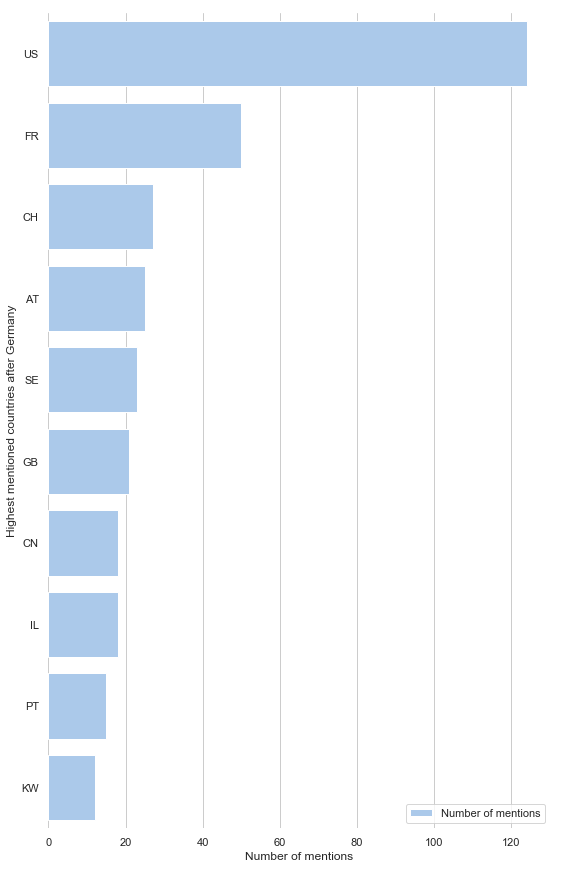

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(9, 15))

# Load the example car crash dataset
#crashes = sns.load_dataset(data)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=data.loc[1:10,"freq"], y=data.loc[1:10,"country code"], 
            label="Number of mentions", color="b")

#ax.set_ylim(,)

# # Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( xlabel="Number of mentions",
        ylabel="Highest mentioned countries after Germany")
sns.despine(left=True, bottom=True)


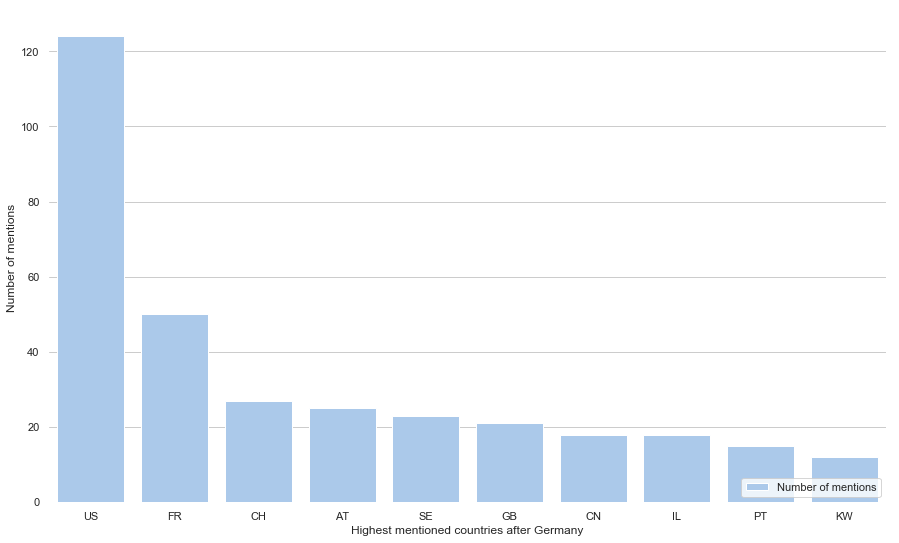

In [151]:

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Load the example car crash dataset
#crashes = sns.load_dataset(data)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=data.loc[1:10,"freq"], x=data.loc[1:10,"country code"], 
            label="Number of mentions", color="b")

#ax.set_yscale('log')

# # Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Number of mentions",
        xlabel="Highest mentioned countries after Germany")
sns.despine(left=True, bottom=True)

In [152]:
city_count

defaultdict(int,
            {'Berlin': 395,
             'Schorndorf': 3,
             'Falkensee': 3,
             'Hamburg': 93,
             'Stuttgart': 144,
             'Hannover': 44,
             'Kornwestheim': 12,
             'Ludwigsburg': 9,
             'Karlsruhe': 13,
             'Man': 3,
             'Boden': 20,
             'Adlershof': 4,
             'Mannheim': 20,
             'Bonn': 19,
             'Köln': 37,
             'Bad Honnef': 6,
             'Bochum': 5,
             'Darmstadt': 16,
             'Rostock': 1,
             'Bremen': 15,
             'Auch': 37,
             'Lage': 16,
             'Wiesbaden': 5,
             'Kassel': 7,
             'Chicago': 9,
             'Konstanz': 1,
             'Magdeburg': 2,
             'Ende': 6,
             'Neustadt': 1,
             'Solon': 1,
             'Aral': 1,
             'Bad Hersfeld': 1,
             'Leipzig': 22,
             'Ingolstadt': 10,
             'Sheffield': 3,
       

# Cities from Germany 

In [66]:
city_count_german = collections.defaultdict(int)
for city, count in city_count.items():
    place = GeoText(city)
    if 'DE' in place.country_mentions:
        city_count_german[city] += count
city_count_german_sorted = sorted(city_count_german.items(), key = itemgetter(1), reverse = True)

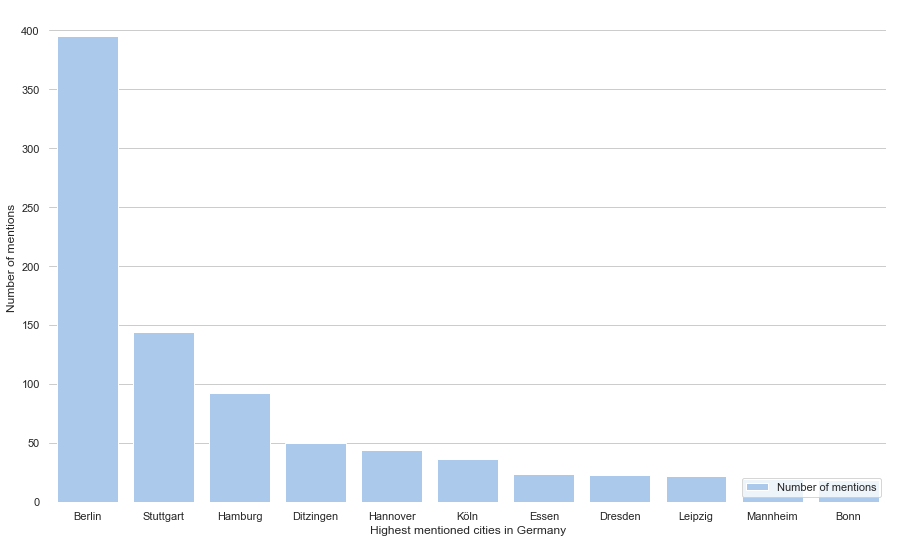

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


data = pd.DataFrame({
   'country code':[pair[0] for pair in city_count_german_sorted],
    'freq':[pair[1] for pair in city_count_german_sorted]})


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Load the example car crash dataset
#crashes = sns.load_dataset(data)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y=data.loc[0:10,"freq"], x=data.loc[0:10,"country code"], 
            label="Number of mentions", color="b")

#ax.set_yscale('log')

# # Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="Number of mentions",
        xlabel="Highest mentioned cities in Germany")
sns.despine(left=True, bottom=True)

In [26]:
df_cities = pd.read_csv('../assets/worldcities.csv')
german_cities = df_cities[df_cities['country'] == 'Germany']

In [27]:
len(german_cities)

58

In [72]:
german_cities[german_cities['city'] == 'Cologne']

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
6280,Cologne,Cologne,50.93,6.95,Germany,DE,DEU,North Rhine-Westphalia,NaN,1004000.0,1276015998


In [28]:
german_cities.head(100)


lat = float(german_cities[german_cities['city'] == 'Hamburg']['lat'])
lon = float(german_cities[german_cities['city'] == 'Hamburg']['lng'])
# lat = german_cities.loc[mask, ['lat']]
# lon = german_cities.loc[mask, ['lng']]
print(lat, lon)


53.55 10.0


In [75]:
city_list = list()
not_found = list()

m2 = folium.Map(location=[51,10], tiles="Mapbox Bright", zoom_start=6)
 
    
for city, count in city_count.items():
    city_info = german_cities[german_cities['city'] == city]
    if count > 0 and len(city_info) > 0:
        city_list.append(city)
        #mask = german_cities['city'] == city
        lat = float(city_info['lat'])
        lon = float(city_info['lng'])

        folium.Circle(
        location=[lat, lon],
        popup = city + ':' + str(count) + ' mentions',
        radius = count * 150,
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
        ).add_to(m2)
    if len(city_info) == 0:
        not_found.append((city, count))
m2.save('germany_counts.html')

#print(not_found)
m2

In [98]:
from sklearn import preprocessing
import seaborn as sns

D:\anaconda\envs\data4good\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


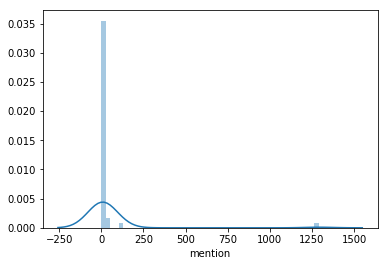

In [100]:
sns.distplot(df['mention'])

In [96]:
names = df.columns

scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df['mention'])


ValueError: Expected 2D array, got 1D array instead:
array=[1.29e+03 1.24e+02 5.00e+01 2.70e+01 2.50e+01 2.30e+01 2.10e+01 1.80e+01
 1.80e+01 1.50e+01 1.20e+01 1.20e+01 1.20e+01 1.00e+01 9.00e+00 8.00e+00
 7.00e+00 7.00e+00 7.00e+00 6.00e+00 6.00e+00 5.00e+00 5.00e+00 5.00e+00
 4.00e+00 4.00e+00 4.00e+00 4.00e+00 3.00e+00 3.00e+00 2.00e+00 2.00e+00
 2.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00
 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00 1.00e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [43]:
cdict['DE'] = 3
cdict

OrderedDict([('US', 2), ('CN', 1), ('DE', 3)])

In [ ]:
flat_sents

In [90]:
file = open('sentences_with_loc.txt', 'w')

In [92]:
file.write(str(sents_with_loc))

1039627

In [93]:
file.close()

In [2]:
import pandas as pd

In [12]:

df_cities = pd.read_csv('../assets/GeoLite2-City-Locations.csv')

In [7]:
file.close()

In [13]:
df_cities.head()

,geoname_id,continent_code,continent_name,country_iso_code,country_name,subdivision_iso_code,subdivision_name,city_name,metro_code,time_zone
0,1861060,AS,Asia,JP,Japan,NaN,NaN,NaN,NaN,Asia/Tokyo
1,1809858,AS,Asia,CN,China,44,Guangdong,Guangzhou,NaN,Asia/Shanghai
2,1850147,AS,Asia,JP,Japan,13,Tōkyō,Tokyo,NaN,Asia/Tokyo
3,1814991,AS,Asia,CN,China,NaN,NaN,NaN,NaN,NaN
4,2077456,OC,Oceania,AU,Australia,NaN,NaN,NaN,NaN,NaN


In [48]:
countries = {'Germany', 'Austria', 'Switzerland'}
mask = df_cities['country_name'] in countries 
german_cities = df_cities.loc[mask, 'city_name']
german_cities  = german_cities.dropna()

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [44]:
len(german_cities)
countries

{'Germany'}

In [27]:
len(german_cities)

7755

In [31]:
'Berlin' in german_cities.values

True

In [49]:
file = open('sentences_with_loc.txt')
sentences_with_loc = list(file)

In [50]:
len(sentences_with_loc)

11748

In [51]:
sentences_with_loc[0]

'[[Biodiversitätsdach auf dem Besucherzentrum der IGA Berlin 2017\n'

In [101]:
len(sentences)

NameError: name 'sentences' is not defined

In [111]:
places = GeoText('Salzburg and London are awesome.')

In [112]:
places.cities

['Salzburg', 'London']

In [114]:
places.country_mentions

OrderedDict([('AT', 1), ('GB', 1)])

# Green corridors - future project proposal

The most relevant references:
<ul>
    <li> Conrad, Jon M., et al. "Wildlife corridors as a connected subgraph problem." Journal of Environmental Economics and Management 63.1 (2012): 1-18.
        </li>
    <li> El-Kebir, Mohammed, and Gunnar W. Klau. "Solving the maximum-weight connected subgraph problem to optimality." arXiv preprint arXiv:1409.5308 (2014).
        </li>
  <ul>